--> Naive Bayes
Exactitud:  0.9315162907268169


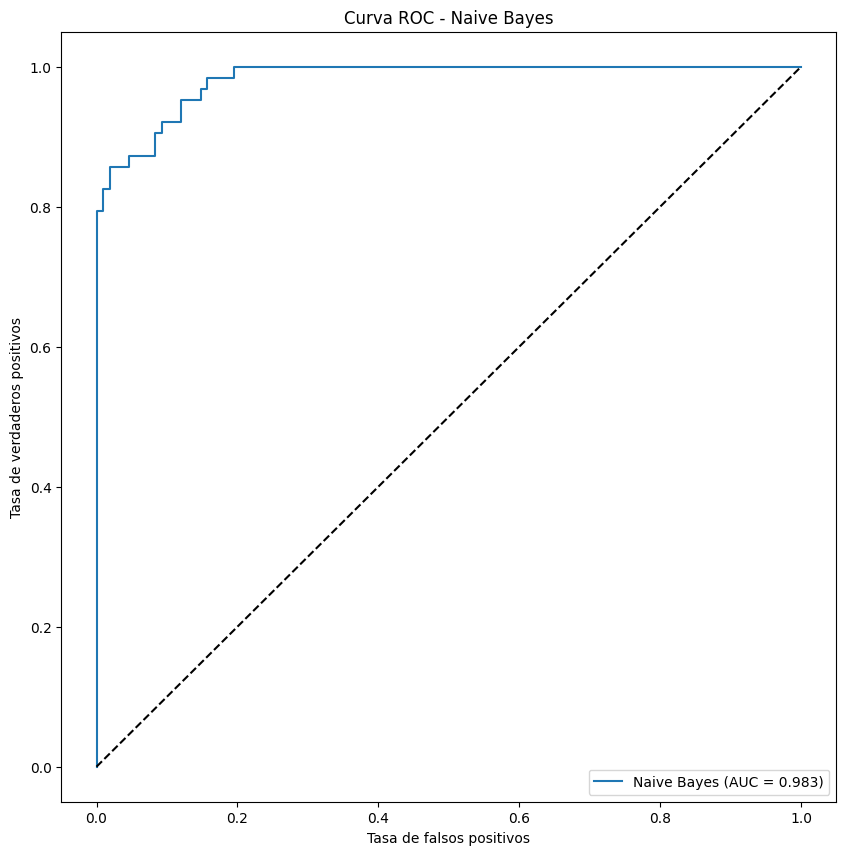

--> Mejor K-Nearest Neighbors: 
Parámetros:  {'n_neighbors': 7}
Exactitud:  0.9683897243107771


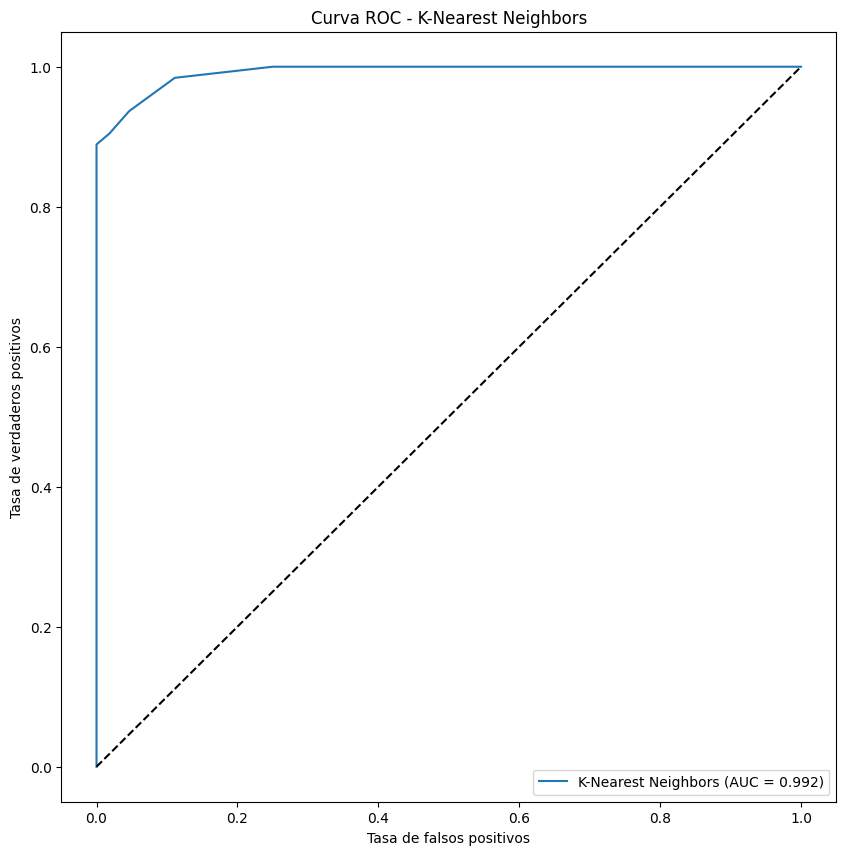

--> Mejor decision tree: 

Parámetros:  {'max_depth': 5, 'min_samples_split': 5}
Exactitud:  0.9227443609022556


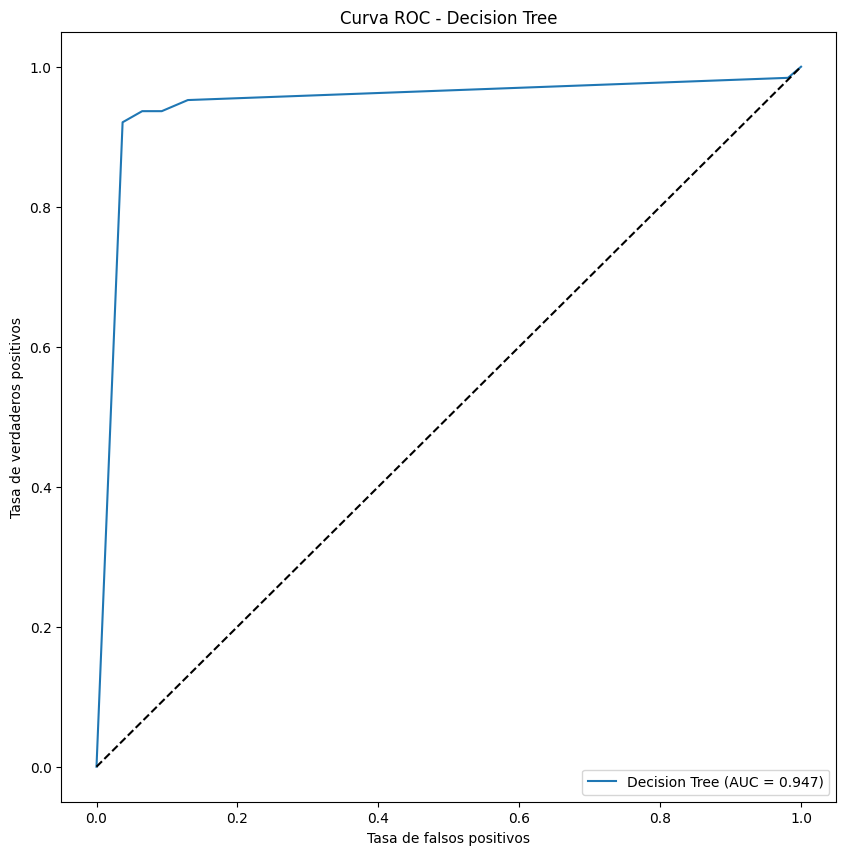

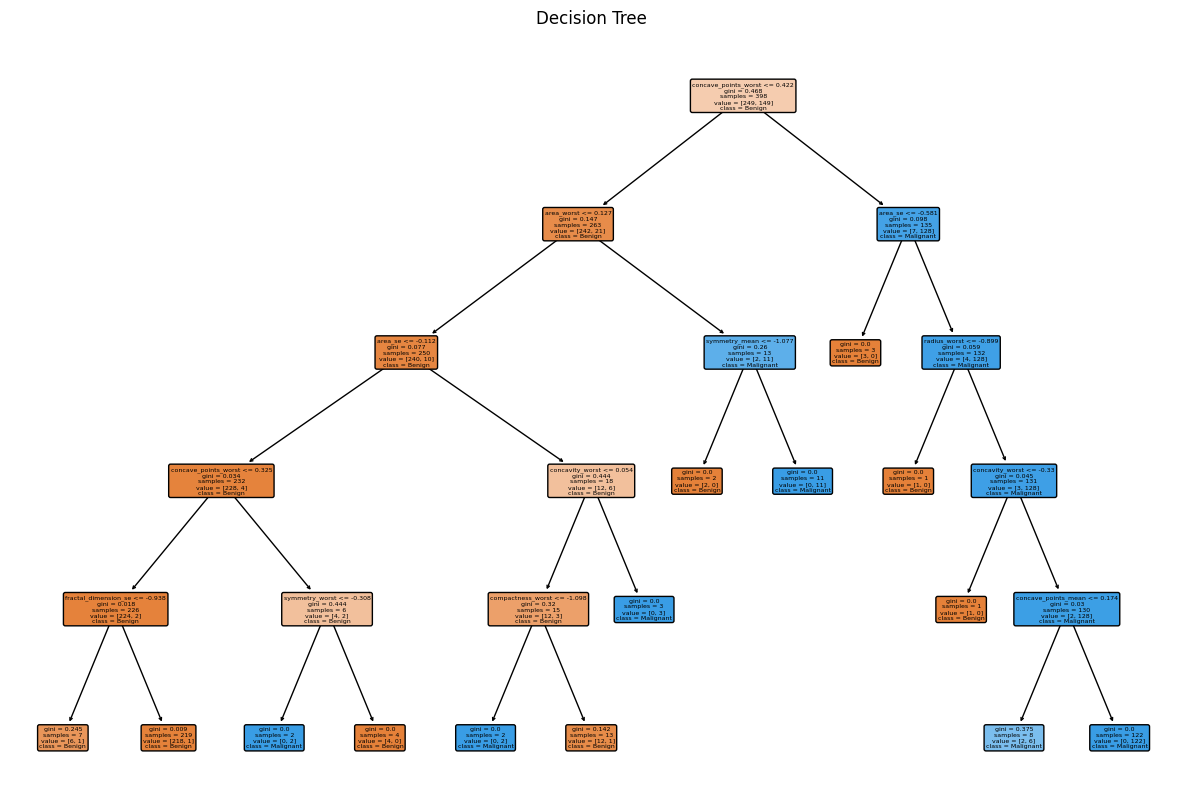

--> Mejor Support Vector Machine: 
Parámetros:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Exactitud:  0.9788847117794486


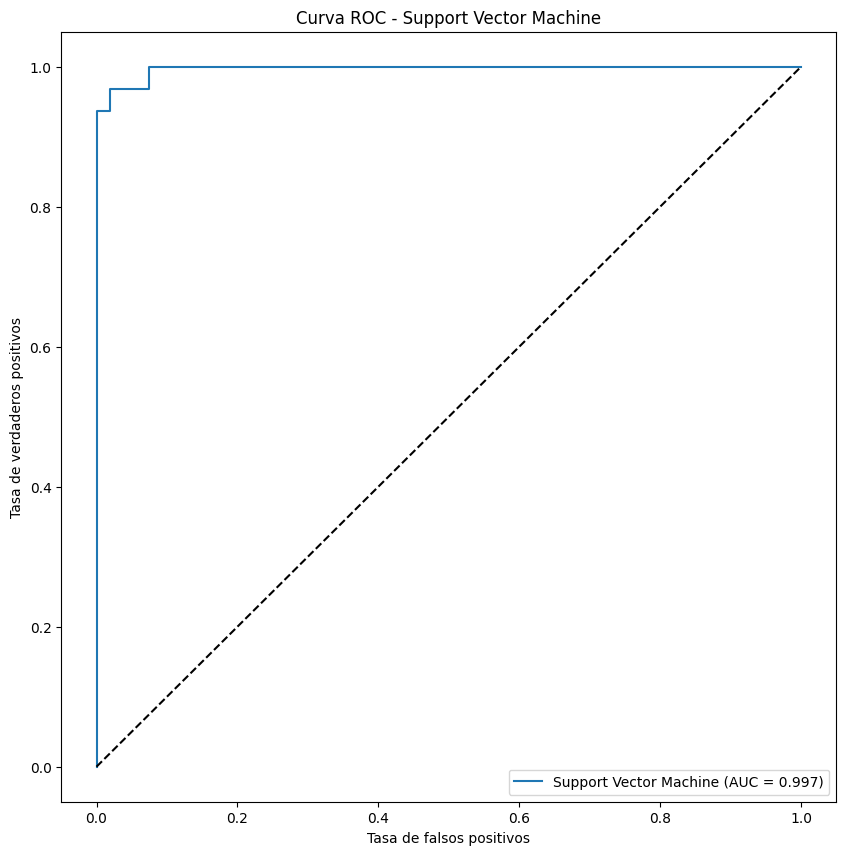

--> Comparación Curvas ROC: 


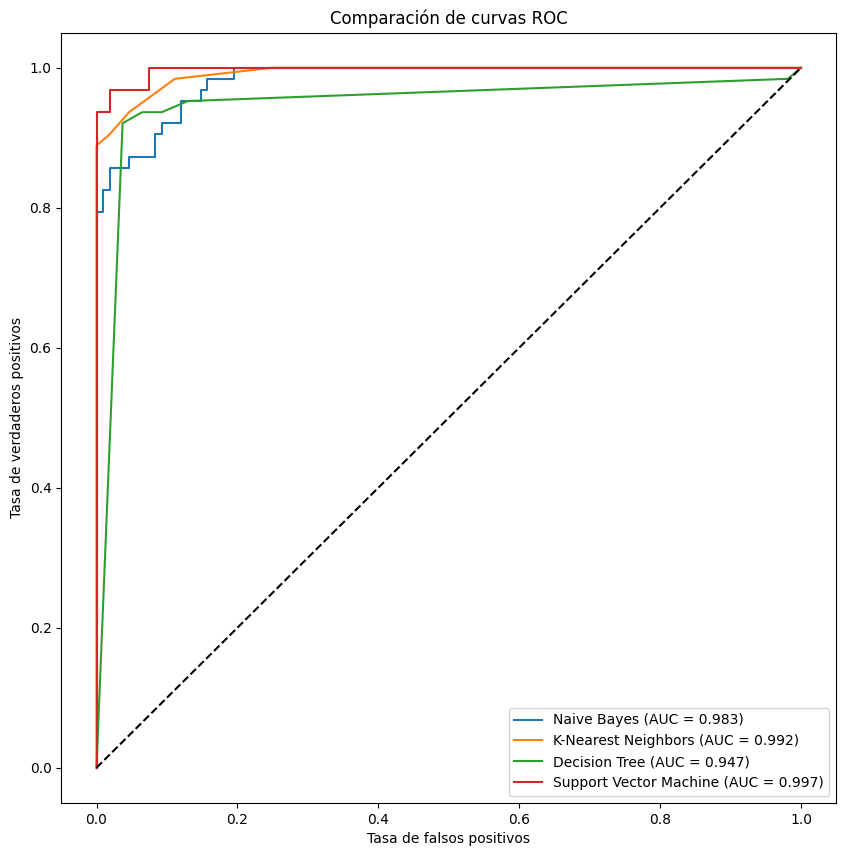

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score, auc, roc_curve, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Especifica la ruta del archivo descargado
ruta_archivo = "wdbc.data"

# Definir los nombres de las columnas
nombres_columnas = ['ID', 'Diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean',
                    'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                    'concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
                    'concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'
                    ]

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(ruta_archivo, names=nombres_columnas, sep=",", header=None)

# Eliminar la columna 'ID'
df = df.drop(['ID'], axis=1)

# Diagnosis tiene valores 'String', usamos labelEncoder() para asignar 1 a M y 0 a B
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])
X = df.drop("Diagnosis", axis = 1)
y = df['Diagnosis']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)


# Función para graficar curvas ROC
def plot_roc_curve(model, X, y, label):
    y_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title(f'Curva ROC - {label}')
    plt.legend(loc='lower right')
    plt.show()

# Función para obtener parámetros curvas ROC
def all_roc_curve(model, X, y, label):
    y_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc




# Clasificador Naive Bayes
estimador_gnb = GaussianNB()
puntuaciones_gnb = cross_val_score(estimador_gnb, X_scaled, y, cv=10, scoring='accuracy')
print("--> Naive Bayes")
print("Exactitud: ", puntuaciones_gnb.mean())

# Curve ROC
estimador_gnb.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
plot_roc_curve(estimador_gnb, X_test, y_test, 'Naive Bayes')






# Clasificador K-Nearest Neighbors
estimador_neigh = KNeighborsClassifier()
param_neigh = {'n_neighbors': range(1, 31)}
estimador_neigh_search = GridSearchCV(estimador_neigh, param_neigh, cv=10, scoring='accuracy')
estimador_neigh_search.fit(X_scaled, y)
print("--> Mejor K-Nearest Neighbors: ")
print("Parámetros: ", estimador_neigh_search.best_params_)
print("Exactitud: ", estimador_neigh_search.best_score_)

# Curve ROC
best_knn = estimador_neigh_search.best_estimator_
best_knn.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
plot_roc_curve(best_knn, X_test, y_test, 'K-Nearest Neighbors')









# Clasificador de árbol de decisión
estimador_arbol = DecisionTreeClassifier()
param_grid_dt = {'max_depth': range(1, 31), 'min_samples_split': range(2, 11)}
grid_search_dt = GridSearchCV(estimador_arbol, param_grid_dt, cv=10, scoring='accuracy')
grid_search_dt.fit(X_scaled, y)
print("--> Mejor decision tree: \n")
print("Parámetros: ",grid_search_dt.best_params_)
print("Exactitud: ",grid_search_dt.best_score_)

# Curve ROC
best_dt = grid_search_dt.best_estimator_
best_dt.fit(X_train,y_train)
plt.figure(figsize=(10, 10))
plot_roc_curve(best_dt, X_test, y_test, 'Decision Tree')

# Árbol de decisión
plt.figure(figsize=(15,10))
plot_tree(best_dt,
               filled=True,
               rounded=True,
               class_names=['Benign', 'Malignant'],
               feature_names=X.columns)
plt.title("Decision Tree")
plt.show()





# Clasificador Support Vector Machine
estimador_svc = SVC(probability=True)
param_grid_svm = {'kernel': ['linear', 'rbf','sigmoid'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_search_svm = GridSearchCV(estimador_svc, param_grid_svm, cv=10, scoring='accuracy')
grid_search_svm.fit(X_scaled, y)
print("--> Mejor Support Vector Machine: ")
print("Parámetros: ", grid_search_svm.best_params_)
print("Exactitud: ", grid_search_svm.best_score_)

# Curve ROC
best_svm = grid_search_svm.best_estimator_
best_svm.fit(X_train,y_train)
plt.figure(figsize=(10, 10))
plot_roc_curve(best_svm, X_test, y_test, 'Support Vector Machine')

# Comparar todas las curvas ROC juntas
fpr_gnb, tpr_gnb, roc_auc_gnb = all_roc_curve(estimador_gnb, X_test, y_test, 'Naive Bayes')
fpr_knn, tpr_knn, roc_auc_knn = all_roc_curve(best_knn, X_test, y_test, 'K-Nearest Neighbors')
fpr_dt, tpr_dt, roc_auc_dt = all_roc_curve(best_dt, X_test, y_test, 'Decision Tree')
fpr_svm, tpr_svm, roc_auc_svm = all_roc_curve(best_svm, X_test, y_test, 'Support Vector Machine')

# Graficar todas las curvas ROC juntas
print("--> Comparación Curvas ROC: ")
plt.figure(figsize=(10, 10))
plt.plot(fpr_gnb, tpr_gnb, label=f'Naive Bayes (AUC = {roc_auc_gnb:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Comparación de curvas ROC')
plt.legend(loc='lower right')
plt.show()


